In [1]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train = pd.read_csv("playground-series-s5e5/train.csv")
test = pd.read_csv("playground-series-s5e5/test.csv")

Adding original dataset for training. 

In [3]:
train_extra = pd.read_csv("calories-burning-dataset/exercise.csv")
train_cal = pd.read_csv("calories-burning-dataset/calories.csv")

In [4]:
train.drop(columns=['id'], inplace=True)

In [5]:
train.shape, train_extra.shape

((750000, 8), (15000, 8))

In [6]:
train_extra.drop(columns=['User_ID'], inplace=True)

In [7]:
train_extra.columns, train.columns

(Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
        'Body_Temp'],
       dtype='object'),
 Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
        'Calories'],
       dtype='object'))

In [8]:
train_extra.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
train_extra.rename(columns={'Gender': 'Sex'}, inplace=True)
train_extra['Calories'] = train_cal['Calories'].values

In [10]:
train_extra.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
train_extra = train_extra[train.columns]  

In [12]:
df = pd.concat([train, train_extra], ignore_index=True)

In [13]:
df.shape

(765000, 8)

In [14]:
df.isna().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
df.duplicated().value_counts()

False    762107
True       2893
Name: count, dtype: int64

In [16]:
df = df[~df.duplicated()].reset_index(drop=True)

In [17]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,762107.000000,762107.000000,762107.000000,762107.000000,762107.000000,762107.000000,762107.000000
mean,41.446593,174.690104,75.136995,15.435313,95.495988,40.037079,88.387137
std,15.221503,12.849988,13.998134,8.351997,9.453520,0.779234,62.397255
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [18]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [19]:
df.shape

(762107, 8)

##  Identify and visualize potential outliers in key numerical features and Calories

Selected columns for outlier box plots: ['Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'Weight', 'Calories']


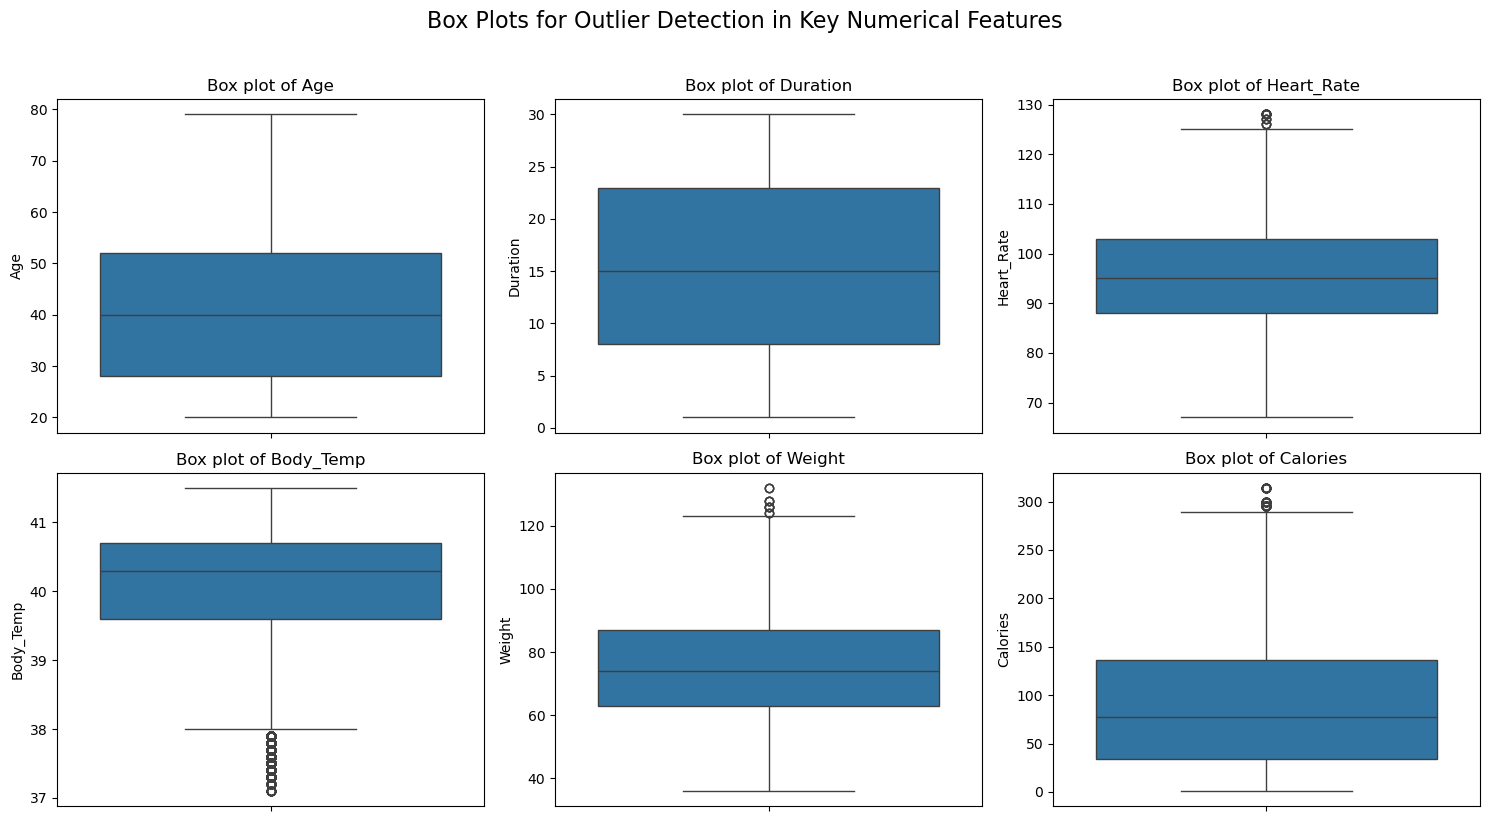

Image saved as: outlier_boxplots_key_features.png


In [20]:
key_cols_outlier = ['Age','Duration', 'Heart_Rate', 'Body_Temp', 'Weight', 'Calories']
print(f"Selected columns for outlier box plots: {key_cols_outlier}")
n_rows_outlier = 2
n_cols_outlier = 3
fig, axes = plt.subplots(n_rows_outlier, n_cols_outlier, figsize=(15, 8))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Generate box plots for each key numerical column
for i, col in enumerate(key_cols_outlier):
    sns.boxplot(y=df[col], ax=axes[i]) # Using y= for vertical box plots
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel('') # Remove x-label as it's redundant for vertical boxplot
    axes[i].set_ylabel(col) # Set y-label to column name

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box Plots for Outlier Detection in Key Numerical Features', fontsize=16, y=1.02) # Add overall title
plt.tight_layout()

# Save the combined plot to a file
image_filename = 'outlier_boxplots_key_features.png'
plt.savefig(image_filename)
plt.show()
print(f"Image saved as: {image_filename}")


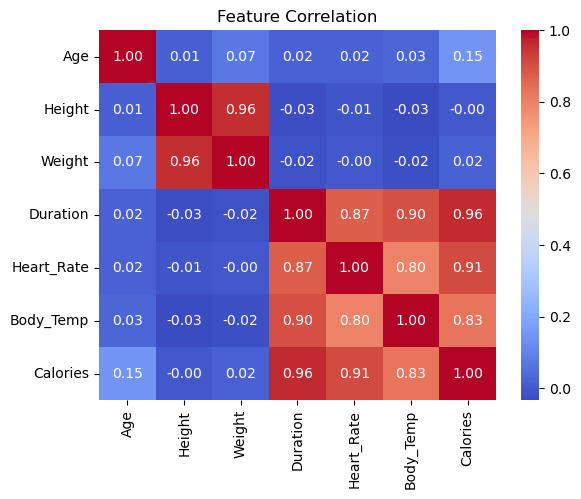

In [21]:
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

* Duration and Heart Rate has high positive correlation with calories. These are important features for model.
* Height and Weight have high correlation with each other and might cause multicollinearity, which can make training unstable, cause redundancy and impact model interpretability.
* Low correlation with calories (e.g. Height) suggests this is irrelavant, or might interact with others in non-obvious ways (e.g. weight). We can consider cross terms or nonlinear transformations.

# Data preprocessing

For random forests, we do not need to create dummy variables. Instead, we can convert the fields to categorical variables. Internally in pandas, this creates a list of all unique values in the column and replaces each value with a number. The number is just an index for looking up the value in the list of all unique values.

In [22]:
def proc_data(df):
    df['Sex'] = pd.Categorical(df.Sex)
    df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
    df = df.drop(columns = ['Weight', 'Height',])
    return df

train_df = proc_data(df)
test_df = proc_data(test)

In [23]:
train_df.columns, test_df.columns

(Index(['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories', 'BMI'], dtype='object'),
 Index(['id', 'Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI'], dtype='object'))

In [24]:
cats=["Sex"]
conts=['Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']
dep="Calories"

In [25]:
train_df.Sex.head()

0      male
1    female
2    female
3      male
4    female
Name: Sex, dtype: category
Categories (2, object): ['female', 'male']

In [26]:
train_df.Sex.cat.codes.head()

0    1
1    0
2    0
3    1
4    0
dtype: int8

In [27]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(train_df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [28]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

m = DecisionTreeRegressor(max_leaf_nodes=5).fit(trn_xs, trn_y);

In [30]:
from sklearn.metrics import root_mean_squared_error

In [31]:
root_mean_squared_error(val_y, m.predict(val_xs))

19.8380291161039

In [32]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

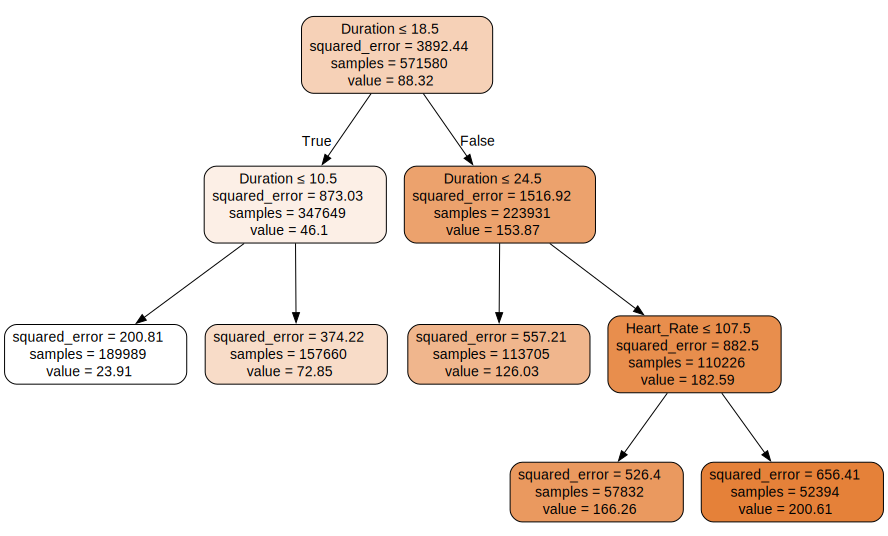

In [33]:
draw_tree(m, trn_xs, size=20)

In [34]:
trn_df.corr(numeric_only=True)["Calories"].sort_values(ascending=False)

Calories      1.000000
Duration      0.959744
Heart_Rate    0.908438
Body_Temp     0.828737
Age           0.145858
BMI           0.049914
Sex           0.013039
Name: Calories, dtype: float64

Text(0.5, 1.0, 'Feature Importances')

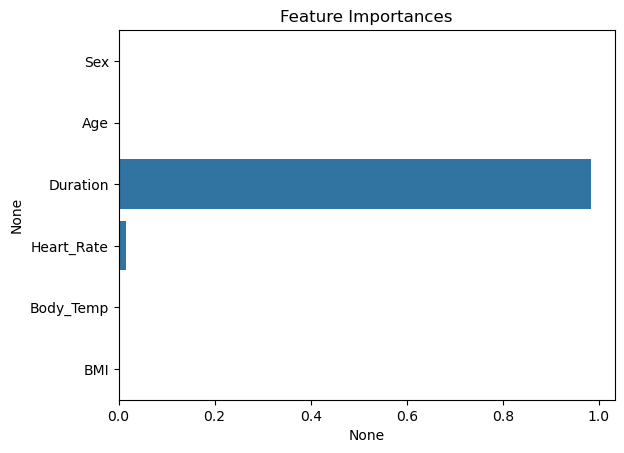

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(m.feature_importances_, index=trn_xs.columns)
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importances")

Here is a simple representation of Decision Tree. This decision tree uses binary splits to make predictions, but its performance is suboptimal. I tried combining the two parameters Duration and heart rate as intensity, but that led the performance did not improve. One possible reason is that the tree relied heavily on a single feature, such as Intensity, for most of its splits. This suggests it may not be effectively utilizing the full range of input features. Additionally, if the tree has a low maximum depth or is limited to a small number of leaf nodes, it may underfit the data, failing to capture important patterns or interactions between variables. As a result, the model's predictive power is limited as expected.

# Random Forests

One solution which can prevent underfitting as well as overfitting (due increase in depth): instead of relying on a single, limited tree, we create many larger trees and average their predictions — a technique called bagging (Bootstrap Aggregating). This is the fundamental idea behind Random Forests.

The key insight is this: if each tree in the ensemble makes predictions that are uncorrelated with the others, the average of their errors will tend toward zero. That’s because the average of many uncorrelated random errors cancels out. As a result, the final ensemble prediction is more accurate and stable than any single tree.

One way we can create a bunch of uncorrelated models is to train each of them on a different random subset of the data.

In [36]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeRegressor(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [37]:
trees = [get_tree() for t in range(100)]

In [38]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

root_mean_squared_error(val_y, avg_probs)

4.240342213543998

In [39]:
preds_std = np.stack(all_probs).std(0)
preds_std.std(0)

1.6710400018121145

If the std deviation is high, this means that lot of trees are giving outputs that are far off from mean.

This loss is much better then decision tree. This is nearly identical to what sklearn's RandomForestClassifier does. The main extra piece in a "real" random forest is that as well as choosing a random sample of data for each tree, it also picks a random subset of columns for each split. Here's how we repeat the above process with a random forest:

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    min_samples_leaf=5,
    n_jobs=-1,          # Use all cores
    verbose=1           # Show progress
)

rf.fit(trn_xs, trn_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


RandomForestRegressor(min_samples_leaf=5, n_jobs=-1, verbose=1)

In [41]:
root_mean_squared_error(val_y, rf.predict(val_xs))

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.4s finished


4.265879968060792

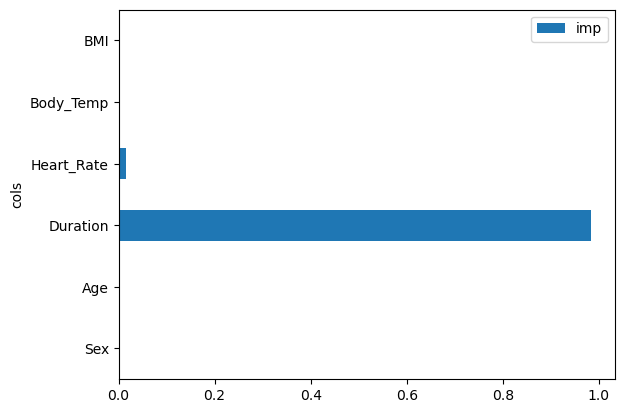

In [42]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

In [43]:
test_copy = test_df.copy()
test_copy.shape, test_df.shape

((250000, 7), (250000, 7))

In [44]:
test_copy = test_copy.drop(columns = ['id'])

In [45]:
test_copy[cats] = test_copy[cats].apply(lambda x: x.cat.codes)

In [46]:
avg_probs = rf.predict(test_copy)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.5s finished


In [47]:
avg_probs.min()

1.0173778166278167

In [48]:
final_preds = np.clip(avg_probs, trn_df["Calories"].min(), trn_df["Calories"].max())  

final_preds.min(), final_preds.max()

(1.0173778166278167, 298.9622761623481)

In [49]:
test_df['Calories'] = final_preds
sub_df = test_df[['id','Calories']]
sub_df.to_csv('rp.csv', index=False)

In [50]:
test_df['Calories'] 

0          28.300515
1         104.512285
2          88.874485
3         128.559003
4          78.454513
             ...    
249995     26.149211
249996      8.672307
249997     73.120306
249998    167.933359
249999     75.414108
Name: Calories, Length: 250000, dtype: float64

With new feature as intensity = heart rate * duration: score 0.07372; 
without it : 0.06487